In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
meteo   = pd.read_csv("meteo-nogal-09.csv", engine = "python")
suelo   = pd.read_csv("soil-nogal-09.csv", engine = "python")

In [3]:
meteo.tail(3)

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
52636,03/01/2010,08:40:00,914.0,0.851,1.321,-0.141,10.38,1563,76.34,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52637,03/01/2010,08:50:00,915.0,0.757,1.295,-0.094,11.25,1564,97.7,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52638,03/01/2010,09:00:00,916.0,0.584,0.75,-0.025,12.03,1564,120.1,871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
suelo.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Eliminando datos innecesarios de "meteo"
none = []
for m in range(0, len(meteo.columns)):
    if(re.search("^Unnamed", meteo.columns[m]) != None):
        none.append(meteo.columns[m])
meteo = meteo.drop(none,1)
meteo = meteo.drop(0,0)
meteo["Date"] = pd.to_datetime(meteo.DATE, dayfirst=True)
meteo = meteo.drop("DATE",1)
meteo["Year"] = meteo["Date"].dt.year
meteo["Month"] = meteo["Date"].dt.month
meteo["Day"] = meteo["Date"].dt.day
meteo1 = pd.DataFrame(meteo[meteo["Date"] <= "2009-12-31"])
meteo1.head(), meteo1.tail()

(    TIME      u_Avg      v_Avg        w_Avg  t_Avg kh20_Avg net_rad_Avg  \
 1  00:10      1.215      0.506       -0.044  10.95    1.159      -176.5   
 2  00:20      0.892      0.588       -0.072  10.81    1.159      -176.6   
 3  00:30      1.227  0.6850001  -0.06900001  10.34    1.224      -175.5   
 4  00:40      1.135  0.7410001       -0.093    9.8    1.258      -182.7   
 5  00:50  0.7550001      1.064       -0.149   8.87    1.332      -184.8   
 
   shf1_Avg shf2_Avg vv_Avg  airT_Avg  rh_Avg e_sat_Avg  e_Avg h2o_hmp_Avg  \
 1    23.58   -26.72  1.327       9.4   0.899     1.178  1.059        8.12   
 2    23.73   -26.76  1.079      9.24   0.896     1.166  1.045        8.02   
 3    23.61   -26.46  1.421  9.059999   0.896     1.152  1.032    7.926001   
 4    23.41   -26.46  1.384  9.059999   0.874     1.152  1.008       7.737   
 5    23.22   -26.39  1.359      8.63   0.859     1.119  0.961        7.39   
 
         Date    Year  Month  Day  
 1 2009-01-01  2009.0    1.0  1.0  


In [6]:

#Tsuelo_10cm,
#for i in range(len(suelo.columns)):
#    print(suelo.columns[i])
          

In [7]:
#Utilizando las columnas necesarias de "suelo"
#2 Year_RTM  L
#3 Day_RTM  L
#4 Hour_Minute_RTM  L
suelo1 = pd.DataFrame()
suelo1["Tsuelo_10cm"] = suelo["Tsuelo_10cm"]
suelo1["Tsuelo_20cm"] = suelo["Tsuelo_20cm"]
suelo1["Tsuelo_40cm"] = suelo["Tsuelo_40cm"]
suelo1["Tsuelo_85cm"] = suelo["Tsuelo_85cm"]
suelo1["Year"] = suelo["2 Year_RTM  L"]
suelo1["Day"] = suelo["3 Day_RTM  L"]
suelo1["Hour"] = suelo["4 Hour_Minute_RTM  L"]
suelo1.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,Year,Day,Hour
0,14.36,14.70,15.52,17.75,2009,1,30
1,14.33,14.70,15.52,17.75,2009,1,100
2,14.28,14.69,15.54,17.74,2009,1,130
3,14.24,14.69,15.55,17.74,2009,1,200
4,14.19,14.69,15.55,17.73,2009,1,230


In [8]:
meteo1.head(3)

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01,2009.0,1.0,1.0
2,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01,2009.0,1.0,1.0
3,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01,2009.0,1.0,1.0


In [9]:
meteo1.dtypes

TIME                   object
u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
Date           datetime64[ns]
Year                  float64
Month                 float64
Day                   float64
dtype: object

In [10]:
Date0 = meteo1["TIME"]
Date1 = meteo1["Date"]
meteo1[meteo1.columns] = meteo[meteo.columns].apply(pd.to_numeric, errors = "coerce")
meteo1["TIME"] = Date0
meteo1["Date"] = Date1
meteo1.dtypes

TIME                   object
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
Date           datetime64[ns]
Year                  float64
Month                 float64
Day                   float64
dtype: object

In [11]:
meteo1.head(1)

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
1,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01,2009.0,1.0,1.0


In [12]:
#Obteniendo los datos para graficar el primer inciso
#Para que la graficación de las temperaturas del aire que son cada 10 min coincidan con las de del suelo
    #que son cada 30 min
Graf = pd.DataFrame()
TempAire  = []
Time = []
Date = []

for i in range(3,145,3):
    TempAire.append(meteo1["t_Avg"][i])
    Time.append(meteo1["TIME"][i])
    Date.append(meteo1["Date"][i])
Graf["TempAire"] = TempAire
Graf["Time"] = Time
Graf["DATE"] = Date
Graf.head()

,TempAire,Time,DATE
0,10.340,00:30,2009-01-01
1,8.760,01:00,2009-01-01
2,8.690,01:30,2009-01-01
3,7.612,02:00,2009-01-01
4,7.761,02:30,2009-01-01


In [13]:
#Llenando los datos para graficar de la temperatura del suelo
Tsuelo10 = []
Tsuelo20 = []
Tsuelo40 = []
Tsuelo85 = []
Hour = []
for i in range(0,48):
    Tsuelo10.append(suelo1["Tsuelo_10cm"][i])
    Tsuelo20.append(suelo1["Tsuelo_20cm"][i])
    Tsuelo40.append(suelo1["Tsuelo_40cm"][i])
    Tsuelo85.append(suelo1["Tsuelo_85cm"][i])
    Hour.append(suelo1["Hour"][i])
Graf["Tsuelo10"] = Tsuelo10
Graf["Tsuelo20"] = Tsuelo20
Graf["Tsuelo40"] = Tsuelo40
Graf["Tsuelo85"] = Tsuelo85
Graf["Hour"] = Hour
Graf.head(1)

,TempAire,Time,DATE,Tsuelo10,Tsuelo20,Tsuelo40,Tsuelo85,Hour
0,10.34,00:30,2009-01-01,14.36,14.7,15.52,17.75,30


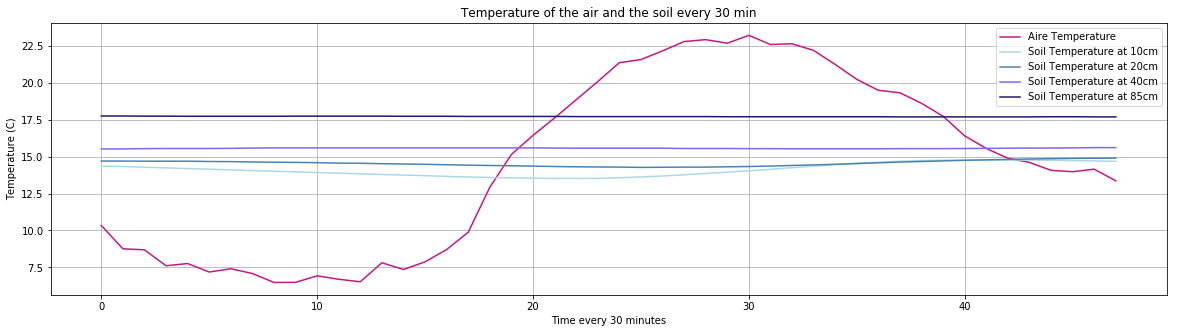

In [14]:
plt.figure(figsize=(20,5))
plt.plot(Graf["TempAire"], label="Aire Temperature", color = "mediumvioletred")
plt.xlabel("Time every 30 minutes")
plt.ylabel("Temperature (C)")
plt.grid()

plt.plot(Graf["Tsuelo10"], label = "Soil Temperature at 10cm", color = "lightblue")
plt.plot(Graf["Tsuelo20"], label = "Soil Temperature at 20cm", color = "steelblue")
plt.plot(Graf["Tsuelo40"], label = "Soil Temperature at 40cm", color = "mediumslateblue")
plt.plot(Graf["Tsuelo85"], label = "Soil Temperature at 85cm", color = "midnightblue")
plt.legend()
plt.title("Temperature of the air and the soil every 30 min")
plt.savefig("grafica_1",plt=2000)
plt.show()

In [15]:
meteo1.tail()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day
52333,23:10:00,0.736,-0.135,12.49,1050.0,-76.38,NaN,NaN,2.595,12.82,0.482,1.480,0.713,5.405,NaN,2009-12-31,2009.0,12.0,31.0
52334,23:20:00,0.711,-0.106,12.24,1047.0,-75.03,NaN,NaN,2.517,12.62,0.489,1.460,0.714,5.416,NaN,2009-12-31,2009.0,12.0,31.0
52335,23:30:00,0.746,-0.116,11.90,1043.0,-74.88,NaN,NaN,2.380,12.30,0.500,1.430,0.715,5.428,NaN,2009-12-31,2009.0,12.0,31.0
52336,23:40:00,0.641,-0.084,11.53,1054.0,-71.33,NaN,NaN,2.182,11.88,0.509,1.391,0.708,5.383,NaN,2009-12-31,2009.0,12.0,31.0
52337,23:50:00,0.538,-0.075,11.31,1064.0,-69.40,NaN,NaN,2.102,11.54,0.516,1.360,0.701,5.338,NaN,2009-12-31,2009.0,12.0,31.0


In [16]:
meteo1["TMean"] = (meteo1.groupby(["Year", "Month", "Day"])["airT_Avg"].transform(np.mean))
meteo1["TMax"] = (meteo1.groupby(["Year", "Month", "Day"])["airT_Avg"].transform(np.max))
meteo1["TMin"] = (meteo1.groupby(["Year", "Month", "Day"])["airT_Avg"].transform(np.min))
#meteo1["Day"]

In [17]:
#Eliminando duplicados para que todo quede dirario
meteo2 = meteo1.drop_duplicates(subset=[ "Month", "Year", "Day"])
meteo2 = meteo2.reset_index(drop=True)
meteo2.tail()

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,...,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day,TMean,TMax,TMin
359,14:50:00,-0.869,0.142,18.82,114.8,206.00,NaN,NaN,1.508,21.05,...,0.354,2.604,NaN,2009-12-27,2009.0,12.0,27.0,0.304227,0.584,0.135
360,00:00:00,0.016,-0.029,10.77,1791.0,-48.01,NaN,NaN,1.435,10.66,...,0.591,4.515,NaN,2009-12-28,2009.0,12.0,28.0,0.375285,0.593,0.136
361,00:00:00,-0.777,0.005,10.87,1249.0,-55.64,NaN,NaN,1.154,10.36,...,0.748,5.718,NaN,2009-12-29,2009.0,12.0,29.0,0.521458,0.776,0.224
362,00:00:00,0.872,-0.126,9.65,1148.0,-57.72,NaN,NaN,1.675,9.05,...,0.735,5.643,NaN,2009-12-30,2009.0,12.0,30.0,0.431569,0.666,0.193
363,00:00:00,0.503,-0.043,11.03,1289.0,-56.06,NaN,NaN,1.608,10.63,...,0.627,4.789,NaN,2009-12-31,2009.0,12.0,31.0,0.373306,0.547,0.141


In [18]:
suelo1.head(3)

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,Year,Day,Hour
0,14.36,14.70,15.52,17.75,2009,1,30
1,14.33,14.70,15.52,17.75,2009,1,100
2,14.28,14.69,15.54,17.74,2009,1,130


In [19]:
#Obtener los datos de temperatura promedio diaria, máxima y mínima de los suelos a diferentes alturas
#Para una profundidad de 10cm
suelo1["TMean10cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_10cm"].transform(np.mean))
suelo1["TMax10cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_10cm"].transform(np.max))
suelo1["TMin10cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_10cm"].transform(np.min))
#Para una profundidad de 20cm
suelo1["TMean20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_20cm"].transform(np.mean))
suelo1["TMax20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_20cm"].transform(np.max))
suelo1["TMin20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_20cm"].transform(np.min))
#Para una profundidad de 40cm
suelo1["TMean40cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_40cm"].transform(np.mean))
suelo1["TMax40cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_40cm"].transform(np.max))
suelo1["TMin40cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_40cm"].transform(np.min))
#Para una profundidad de 85cm
suelo1["TMean20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_85cm"].transform(np.mean))
suelo1["TMax20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_85cm"].transform(np.max))
suelo1["TMin20cm"] = (suelo1.groupby(["Year", "Day"])["Tsuelo_85cm"].transform(np.min))

#Eliminando duplicados para que todo quede dirario
suelo2 = suelo1.drop_duplicates(subset=["Year", "Day"])
suelo2 = suelo2.reset_index(drop=True)
suelo2.tail()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm,Year,Day,Hour,TMean10cm,TMax10cm,TMin10cm,TMean20cm,TMax20cm,TMin20cm,TMean40cm,TMax40cm,TMin40cm
360,13.22,13.72,15.43,17.75,2009,361,1730,13.355714,13.40,13.22,17.738571,17.76,17.72,15.415714,15.44,15.40
361,13.37,13.91,15.40,17.71,2009,362,30,13.301042,13.69,13.00,17.634167,17.71,17.57,15.347500,15.40,15.30
362,13.69,14.03,15.31,17.57,2009,363,30,13.453125,13.74,13.06,17.494375,17.57,17.44,15.323542,15.36,15.28
363,13.65,14.05,15.31,17.44,2009,364,30,13.393750,13.78,12.96,17.390625,17.44,17.34,15.277292,15.32,15.22
364,13.71,14.06,15.24,17.35,2009,365,30,13.527292,13.96,13.11,17.297917,17.35,17.26,15.246250,15.28,15.20


In [20]:
# for i in range(0,len(meteo2)):
#     print(meteo2["Day"][i])
#     if(meteo2["Day"][i+1]==meteo2["Day"][i]+1):
#         continue
#     elif(meteo2["Day"][i+1] != meteo2["Day"][i]+1):
#         print("aaaa",i)
        

In [21]:
#Falta un día!!!!!!!!
for i in range(290,296):
    print(i, meteo2["Day"][i])

(290, 18.0)
(291, 19.0)
(292, 20.0)
(293, 21.0)
(294, 23.0)
(295, 24.0)


In [22]:
meteo2.tail(10)

,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,...,e_sat_Avg,e_Avg,h2o_hmp_Avg,Date,Year,Month,Day,TMean,TMax,TMin
354,00:00:00,1.179,0.051,-0.020,13.76,48.94,-38.42,NaN,NaN,1.188,...,1.389,0.842,6.402,2009-12-22,2009.0,12.0,22.0,6.975056,20.990,0.413
355,00:00:00,-2.666,0.266,15.670,26.17,-74.42,NaN,NaN,3.348,15.690,...,1.218,9.140,NaN,2009-12-23,2009.0,12.0,23.0,0.518562,0.752,0.220
356,00:00:00,-0.378,0.012,7.906,62.77,-69.68,NaN,NaN,0.942,5.562,...,0.629,4.889,NaN,2009-12-24,2009.0,12.0,24.0,0.478667,0.807,0.244
357,00:00:00,0.697,-0.031,9.610,65.12,-65.55,NaN,NaN,1.446,8.800,...,0.621,4.769,NaN,2009-12-25,2009.0,12.0,25.0,0.453095,0.792,0.188
358,09:50:00,-0.047,-0.058,9.720,82.50,238.60,NaN,NaN,1.335,13.020,...,0.495,3.748,NaN,2009-12-26,2009.0,12.0,26.0,0.182320,0.338,0.141
359,14:50:00,-0.869,0.142,18.820,114.80,206.00,NaN,NaN,1.508,21.050,...,0.354,2.604,NaN,2009-12-27,2009.0,12.0,27.0,0.304227,0.584,0.135
360,00:00:00,0.016,-0.029,10.770,1791.00,-48.01,NaN,NaN,1.435,10.660,...,0.591,4.515,NaN,2009-12-28,2009.0,12.0,28.0,0.375285,0.593,0.136
361,00:00:00,-0.777,0.005,10.870,1249.00,-55.64,NaN,NaN,1.154,10.360,...,0.748,5.718,NaN,2009-12-29,2009.0,12.0,29.0,0.521458,0.776,0.224
362,00:00:00,0.872,-0.126,9.650,1148.00,-57.72,NaN,NaN,1.675,9.050,...,0.735,5.643,NaN,2009-12-30,2009.0,12.0,30.0,0.431569,0.666,0.193
363,00:00:00,0.503,-0.043,11.030,1289.00,-56.06,NaN,NaN,1.608,10.630,...,0.627,4.789,NaN,2009-12-31,2009.0,12.0,31.0,0.373306,0.547,0.141


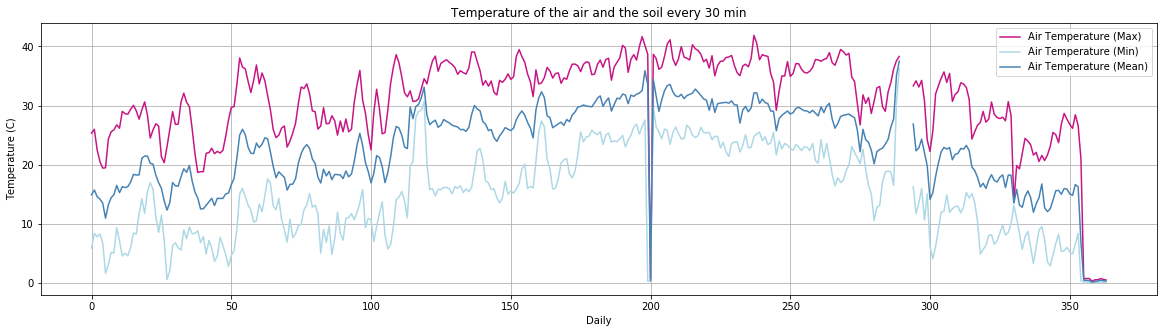

In [23]:
meteo2.tail(1)

#A graficar
plt.figure(figsize=(20,5))
plt.plot(meteo2["TMax"], label = "Air Temperature (Max)", color = "mediumvioletred")
plt.plot(meteo2["TMin"], label = "Air Temperature (Min)", color = "lightblue")
plt.plot(meteo2["TMean"],label = "Air Temperature (Mean)", color = "steelblue")
#plt.plot(soil["Tsuelo40"], label = "Soil Temperature at 40cm", color = "mediumslateblue")
# plt.plot(Graf["Tsuelo85"], label = "Soil Temperature at 85cm", color = "midnightblue")
plt.xlabel("Daily")
plt.ylabel("Temperature (C)")
plt.legend()
plt.grid()
plt.title("Temperature of the air and the soil every 30 min")
plt.savefig("grafica_aireTodo",plt=2000)
plt.show()

In [24]:
var = 0
temp = 0
for m in range(1,len(meteo1)):
    if(meteo1["Day"][m] == 2):
        var = meteo1["Day"][m]
        temp = meteo1["TIME"][m-1]
        print(m,var,temp)
        break
#meteo1.loc["52338"] = [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]


(144, 2.0, '23:50')


In [25]:
meteo1 = meteo1.reset_index(drop=True)

In [44]:
#   Datos del primer día de enero con el promedio de la temperatura del aire
#   Cada intervalo de 3 (porque así coincide con cada 30 minutos)
#   Me haga la suma de los tres datos ya que se sumaron los tres se saque el promedio
#y lo guarde en PROM
#   
suma = 0
prom = 0
PromDay = []
DateDay = []
Count = 0
for m in range(1, len(meteo1), 3):
    if(meteo1["Day"][m] == 1 ):
        suma = meteo1["airT_Avg"][m] + meteo1["airT_Avg"][m+1] + meteo1["airT_Avg"][m+2]
        prom = suma/3
        Count += 1
        PromDay.append(prom)
        DateDay.append(Count)
    else:
        break

In [50]:
#   Datos de todo el mes de enero con el promedio de la temperatura del aire
suma = 0
prom = 0
PromMonth = []
DateMonth = []
Count = 0
for m in range(1, len(meteo1), 3):
    if(meteo1["Day"][m] >= 1):
        suma = meteo1["airT_Avg"][m] + meteo1["airT_Avg"][m+1] + meteo1["airT_Avg"][m+2]
        prom = suma/3
        Count += 1
        PromMonth.append(prom)
        DateMonth.append(Count)
        if(meteo1["Day"][m] == 31):
            break

<function matplotlib.pyplot.show>

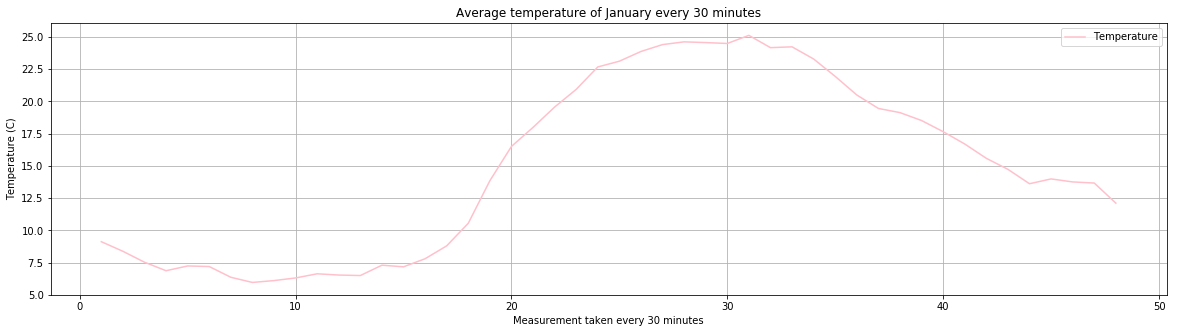

In [68]:
#   Grafcia de la temperatura promedio del aire para el primero de enero cada 30 minutos
plt.figure(figsize = (20,5))
plt.plot(DateDay, PromDay, label="Temperature", color = "pink")
plt.title("Average temperature of January 1st every 30 minutes")
plt.ylabel("Temperature (C)")
plt.xlabel("Measurement taken every 30 minutes")
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show>

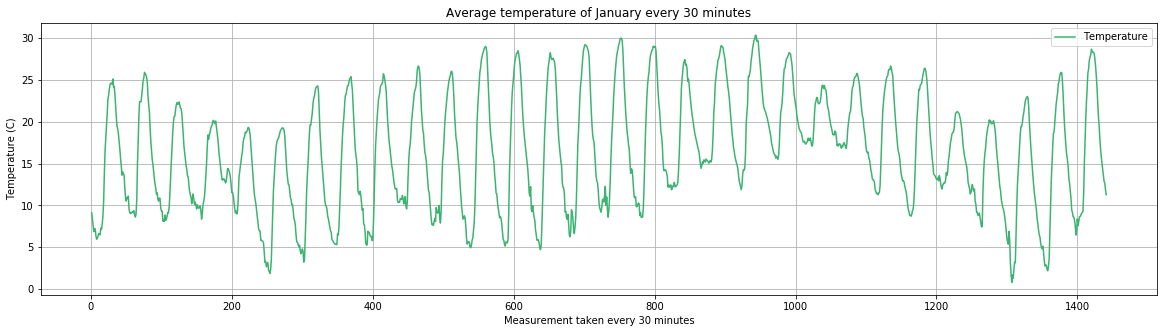

In [69]:
#   Grafcia de la temperatura promedio del aire para enero cada 30 minutos
plt.figure(figsize = (20,5))
plt.plot(DateMonth, PromMonth, label="Temperature", color = "mediumseagreen")
plt.title("Average temperature of January every 30 minutes")
plt.ylabel("Temperature (C)")
plt.xlabel("Measurement taken every 30 minutes")
plt.legend()
plt.grid()
plt.show
# #   Gráfica de la temperatura promedio cada 30 minutos en el mes de enero
# plt.figure(figsize = (20,5))
# plt.plot(DateMonth, PromMonth)
# plt.grid()
# plt.show

In [30]:
#   Datos usando un promedio suavizado de las temperaturas promedio cada 30 minutos del primero de enero
#   DRD := Date Round Daily
#   PRD := Mean Round Daily
suma = 0
prom = 0
PRD = []
DRD = []
count = 1
for m in range(1, len(meteo1), 3):
    if(meteo1["Day"][m] == 1 ):
        suma = meteo1["airT_Avg"][m]
        PRD.append(suma)
        DRD.append(count)
        count+=1
        
        suma = suma + meteo1["airT_Avg"][m+1]
        prom = suma/2
        PRD.append(prom)
        DRD.append(count)
        count+=1
        
        suma = suma + meteo1["airT_Avg"][m+2]
        prom = suma/3
        PRD.append(prom)
        DRD.append(count)
        count+=1
        
    else:
        break

In [31]:
#   Datos usando un promedio suavizado de las temperaturas del aire cada 30 minutos por el mes de enero
#   DRM := Date Round Monthly
#   PRM := Mean Round Monthly
suma = 0
prom = 0
PRM = []
DRM = []
count = 1
for m in range(1, len(meteo1), 3):
    if(meteo1["Day"][m] >= 1 ):
        suma = meteo1["airT_Avg"][m]
        PRM.append(suma)
        DRM.append(count)
        count+=1
        
        suma = suma + meteo1["airT_Avg"][m+1]
        prom = suma/2
        PRM.append(prom)
        DRM.append(count)
        count+=1
        
        suma = suma + meteo1["airT_Avg"][m+2]
        prom = suma/3
        PRM.append(prom)
        DRM.append(count)
        count+=1
        
        if(meteo1["Day"][m] == 31):
            break

<function matplotlib.pyplot.show>

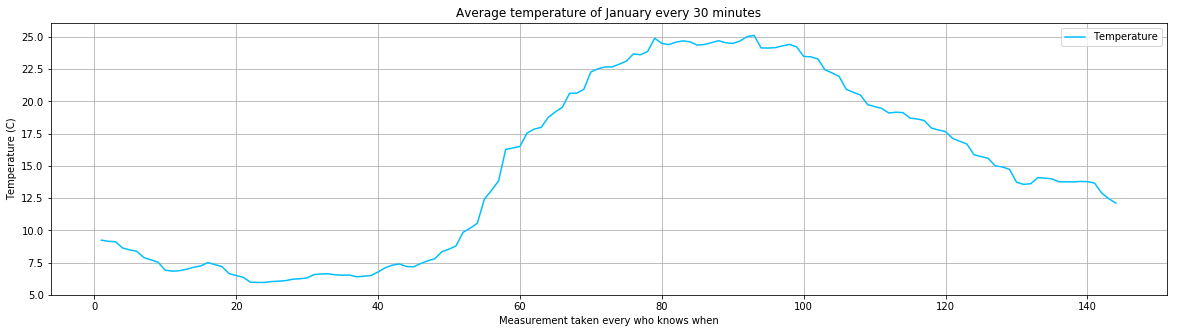

In [70]:
#   Gráfica del promedio móbil cada 30 minutos de la temperatura el aire ["airT_Avg"] del mes de enero
#   DRM := Date Round Monthly
#   PRM := Mean Round Monthly#   Grafcia de la temperatura promedio del aire para el primero de enero cada 30 minutos
plt.figure(figsize = (20,5))
plt.plot(DRD, PRD, label="Temperature", color = "deepskyblue")
plt.title("Average temperature of January 1st by rolling mean every 30 minutes")
plt.ylabel("Temperature (C)")
plt.xlabel("Measurement taken every who knows when")
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show>

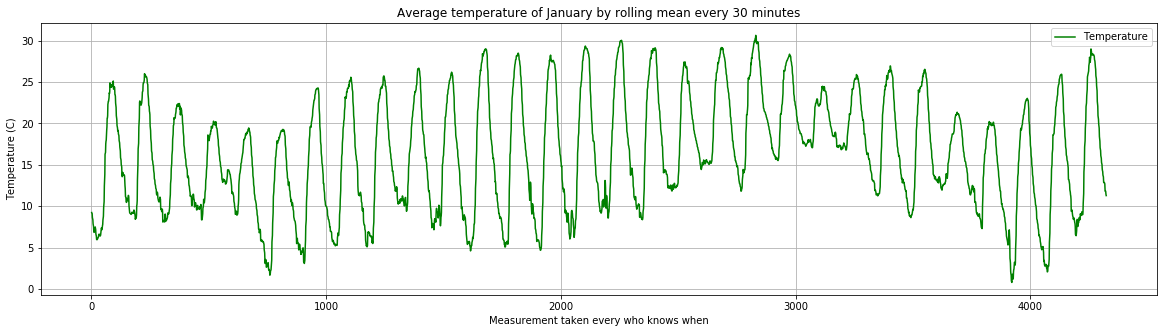

In [71]:
#   Gráfica del promedio móbil cada 30 minutos de la temperatura el aire ["airT_Avg"] del primero de enero
#   DRM := Date Round Monthly
#   PRM := Mean Round Monthly
#   Grafcia de la temperatura promedio del aire para el primero de enero cada 30 minutos
plt.figure(figsize = (20,5))
plt.plot(DRM, PRM, label = "Temperature", color = "g")
plt.title("Average temperature of January by rolling mean every 30 minutes")
plt.ylabel("Temperature (C)")
plt.xlabel("Measurement taken every who knows when")
plt.legend()
plt.grid()
plt.show

In [110]:
#   Datos del suelo para graficar del mes de enero. Como las mediciones están hechas cada 30 min no se puede sacar promedio cada 30 min
TS10m = []
TS20m = []
TS40m = []
TS85m = []
Hourm = []
count = 0
for m in range(1,len(suelo1)):
    if(suelo1["Day"][m] >= 1):
        count += 1
        TS10m.append(suelo1["Tsuelo_10cm"][m])
        TS20m.append(suelo1["Tsuelo_20cm"][m])
        TS40m.append(suelo1["Tsuelo_40cm"][m])
        TS85m.append(suelo1["Tsuelo_85cm"][m])
        Hourm.append(count)
        if(suelo1["Day"][m] == 32):
            break

In [116]:
#   Datos del suelo para graficar del primero de enero. Como las mediciones están hechas cada 30 min no se puede sacar promedio cada 30 min
TS10d = []
TS20d = []
TS40d = []
TS85d = []
Hourd = []
count = 0
for m in range(1,len(suelo1)):
    if(suelo1["Day"][m] == 1):
        count += 1
        TS10d.append(suelo1["Tsuelo_10cm"][m])
        TS20d.append(suelo1["Tsuelo_20cm"][m])
        TS40d.append(suelo1["Tsuelo_40cm"][m])
        TS85d.append(suelo1["Tsuelo_85cm"][m])
        Hourd.append(count)
    else:
        break

<function matplotlib.pyplot.show>

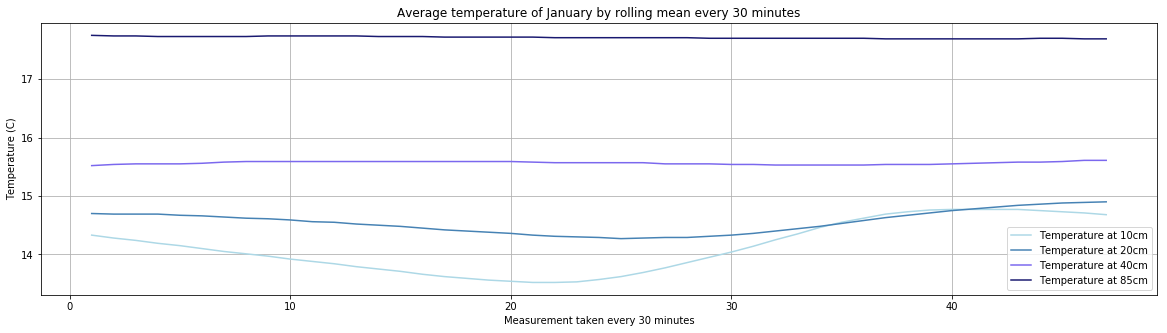

In [112]:
#Grafica de los datos de la tierra medidos cada 30 minutos para el primero de enero
plt.figure(figsize = (20,5))
plt.plot(Hourd, TS10d, label = "Temperature at 10cm", color = "lightblue")
plt.plot(Hourd, TS20d, label = "Temperature at 20cm", color = "steelblue")
plt.plot(Hourd, TS40d, label = "Temperature at 40cm", color = "mediumslateblue")
plt.plot(Hourd, TS85d, label = "Temperature at 85cm", color = "midnightblue")
plt.title("Average temperature of January by rolling mean every 30 minutes")
plt.ylabel("Temperature (C)")
plt.xlabel("Measurement taken every 30 minutes")
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show>

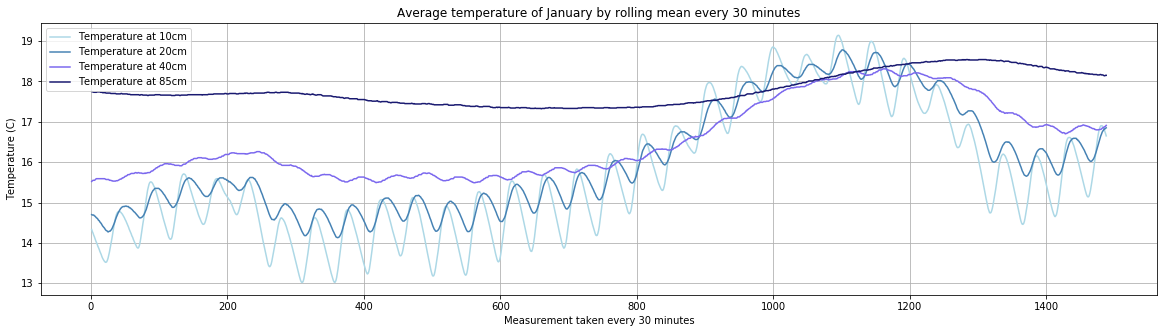

In [113]:
#Grafica de los datos de la tierra medidos cada 30 minutos para el mes de enero
plt.figure(figsize = (20,5))
plt.plot(Hourm, TS10m, label = "Temperature at 10cm", color = "lightblue")
plt.plot(Hourm, TS20m, label = "Temperature at 20cm", color = "steelblue")
plt.plot(Hourm, TS40m, label = "Temperature at 40cm", color = "mediumslateblue")
plt.plot(Hourm, TS85m, label = "Temperature at 85cm", color = "midnightblue")
plt.title("Average temperature of January by rolling mean every 30 minutes")
plt.ylabel("Temperature (C)")
plt.xlabel("Measurement taken every 30 minutes")
plt.legend()
plt.grid()
plt.show

In [118]:
len(Hourd)

47